In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_tracks/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [3]:
#exp_tag = 'fe3_d1_rt20p_paired'
exp_tag = 'fe2_d2_rt20p_paired'

In [4]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks_{exp_tag}.pickle')

In [5]:
usdm_dtd = dnw.prune_tracks(usdm_dtd)

In [6]:
spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks_{exp_tag}.pickle')

In [7]:
spi30d_dtd = dnw.prune_tracks(spi30d_dtd)

In [8]:
spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks_{exp_tag}.pickle')

In [9]:
spi180d_dtd = dnw.prune_tracks(spi180d_dtd)

In [10]:
usdm_summ, usdm_summ_grp = dnw.compute_track_summary_characterization(usdm_dtd, 7)

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_tracks/../../../ndrought/wrangle_v11.py:971: FutureWarning: ['xy_size', 'uv_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return summary_df, summary_df.groupby(pd.cut(summary_df.lifetime, bins=bins)).agg(['mean', 'median', 'max', 'min', 'std', 'count'])


In [11]:
spi30d_summ, spi30d_summ_grp = dnw.compute_track_summary_characterization(spi30d_dtd, 5)

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_tracks/../../../ndrought/wrangle_v11.py:971: FutureWarning: ['xy_size', 'uv_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return summary_df, summary_df.groupby(pd.cut(summary_df.lifetime, bins=bins)).agg(['mean', 'median', 'max', 'min', 'std', 'count'])


In [12]:
spi180d_summ, spi180d_summ_grp = dnw.compute_track_summary_characterization(spi180d_dtd, 5)

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_tracks/../../../ndrought/wrangle_v11.py:971: FutureWarning: ['xy_size', 'uv_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return summary_df, summary_df.groupby(pd.cut(summary_df.lifetime, bins=bins)).agg(['mean', 'median', 'max', 'min', 'std', 'count'])


In [13]:
usdm_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",17.0,14.0,28,7,9.0,14
"(30, 60]",44.0,46.0,49,35,6.0,6
"(60, 90]",70.0,63.0,84,63,11.0,6
"(90, 180]",106.0,105.0,140,91,17.0,9
"(180, 365]",261.0,245.0,350,203,69.0,4
"(365, 730]",490.0,490.0,490,490,NaN,1
"(730, 1825]",914.0,914.0,973,854,84.0,2
"(1825, 8141]",2062.0,2062.0,2219,1904,223.0,2


In [14]:
spi30d_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",10.0,10.0,30.0,5.0,6.0,298
"(30, 60]",45.0,42.0,60.0,35.0,10.0,6
"(60, 90]",75.0,75.0,75.0,75.0,NaN,1
"(90, 180]",NaN,NaN,NaN,NaN,NaN,0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [15]:
spi180d_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",12.0,10.0,30.0,5.0,8.0,176
"(30, 60]",44.0,45.0,60.0,35.0,7.0,28
"(60, 90]",72.0,70.0,90.0,65.0,9.0,9
"(90, 180]",124.0,122.0,170.0,95.0,27.0,16
"(180, 365]",215.0,215.0,225.0,205.0,14.0,2
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [16]:
(usdm_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",42.0,13.0,157.0,0.0,54.0,0.0
"(30, 60]",74.0,54.0,166.0,0.0,67.0,0.0
"(60, 90]",64.0,23.0,236.0,9.0,87.0,0.0
"(90, 180]",155.0,110.0,390.0,14.0,141.0,0.0
"(180, 365]",283.0,154.0,738.0,86.0,310.0,0.0
"(365, 730]",2989.0,2989.0,2989.0,2989.0,NaN,0.0
"(730, 1825]",3416.0,3416.0,3749.0,3082.0,471.0,0.0
"(1825, 8141]",9021.0,9021.0,9495.0,8546.0,671.0,0.0


In [17]:
(spi30d_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",227.0,131.0,2670.0,3.0,314.0,0.0
"(30, 60]",1098.0,838.0,2519.0,547.0,744.0,0.0
"(60, 90]",2516.0,2516.0,2516.0,2516.0,NaN,0.0
"(90, 180]",NaN,NaN,NaN,NaN,NaN,0.0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
(spi180d_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",79.0,37.0,694.0,0.0,107.0,0.0
"(30, 60]",317.0,295.0,1335.0,25.0,264.0,0.0
"(60, 90]",318.0,266.0,549.0,167.0,149.0,0.0
"(90, 180]",1024.0,739.0,2762.0,46.0,890.0,0.0
"(180, 365]",4866.0,4866.0,6541.0,3191.0,2369.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [19]:
(usdm_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",28.0,13.0,113.0,0.0,38.0,0.0
"(30, 60]",51.0,52.0,99.0,0.0,35.0,0.0
"(60, 90]",35.0,15.0,103.0,9.0,38.0,0.0
"(90, 180]",82.0,69.0,295.0,10.0,91.0,0.0
"(180, 365]",75.0,57.0,182.0,3.0,80.0,0.0
"(365, 730]",362.0,362.0,362.0,362.0,NaN,0.0
"(730, 1825]",894.0,894.0,1088.0,700.0,275.0,0.0
"(1825, 8141]",830.0,830.0,1070.0,590.0,339.0,0.0


In [20]:
(spi30d_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",118.0,71.0,977.0,1.0,142.0,0.0
"(30, 60]",206.0,215.0,473.0,22.0,160.0,0.0
"(60, 90]",207.0,207.0,207.0,207.0,NaN,0.0
"(90, 180]",NaN,NaN,NaN,NaN,NaN,0.0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
(spi180d_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",34.0,14.0,324.0,0.0,51.0,0.0
"(30, 60]",93.0,59.0,543.0,6.0,111.0,0.0
"(60, 90]",87.0,66.0,214.0,5.0,71.0,0.0
"(90, 180]",215.0,157.0,615.0,3.0,193.0,0.0
"(180, 365]",248.0,248.0,311.0,184.0,90.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [22]:
(usdm_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",3.0,1.0,15.0,0.0,5.0,0.0
"(30, 60]",2.0,1.0,4.0,0.0,2.0,0.0
"(60, 90]",1.0,0.0,3.0,0.0,1.0,0.0
"(90, 180]",1.0,1.0,4.0,0.0,1.0,0.0
"(180, 365]",1.0,1.0,3.0,0.0,1.0,0.0
"(365, 730]",6.0,6.0,6.0,6.0,NaN,0.0
"(730, 1825]",4.0,4.0,4.0,4.0,0.0,0.0
"(1825, 8141]",4.0,4.0,4.0,4.0,0.0,0.0


In [23]:
(spi30d_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",21.0,14.0,205.0,1.0,22.0,0.0
"(30, 60]",23.0,19.0,46.0,15.0,12.0,0.0
"(60, 90]",34.0,34.0,34.0,34.0,NaN,0.0
"(90, 180]",NaN,NaN,NaN,NaN,NaN,0.0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [24]:
(spi180d_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",6.0,4.0,54.0,0.0,8.0,0.0
"(30, 60]",7.0,7.0,24.0,1.0,5.0,0.0
"(60, 90]",4.0,4.0,8.0,2.0,2.0,0.0
"(90, 180]",8.0,6.0,19.0,0.0,6.0,0.0
"(180, 365]",23.0,23.0,32.0,14.0,13.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [25]:
usdm_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.874,0.931,1.000,0.463,0.172,14
"(30, 60]",0.915,0.924,1.000,0.803,0.066,6
"(60, 90]",0.937,0.941,0.985,0.864,0.045,6
"(90, 180]",0.921,0.901,0.967,0.877,0.040,9
"(180, 365]",0.942,0.959,0.963,0.890,0.035,4
"(365, 730]",0.904,0.904,0.904,0.904,NaN,1
"(730, 1825]",0.929,0.929,0.932,0.925,0.005,2
"(1825, 8141]",0.943,0.943,0.946,0.940,0.004,2


In [26]:
spi30d_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.552,0.544,0.942,0.075,0.163,298
"(30, 60]",0.525,0.519,0.582,0.489,0.032,6
"(60, 90]",0.462,0.462,0.462,0.462,NaN,1
"(90, 180]",NaN,NaN,NaN,NaN,NaN,0
"(180, 365]",NaN,NaN,NaN,NaN,NaN,0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [27]:
spi180d_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.712,0.721,0.996,0.260,0.159,176
"(30, 60]",0.681,0.671,0.911,0.529,0.093,28
"(60, 90]",0.712,0.737,0.842,0.565,0.091,9
"(90, 180]",0.754,0.743,0.878,0.614,0.076,16
"(180, 365]",0.683,0.683,0.713,0.654,0.042,2
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


## Boxplots

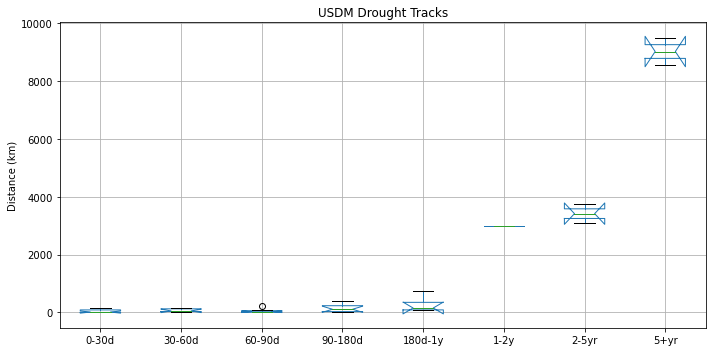

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['distance']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("USDM Drought Tracks")

plt.tight_layout()

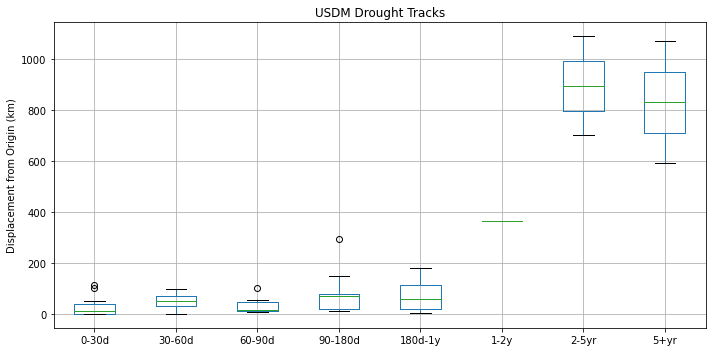

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['displacement']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

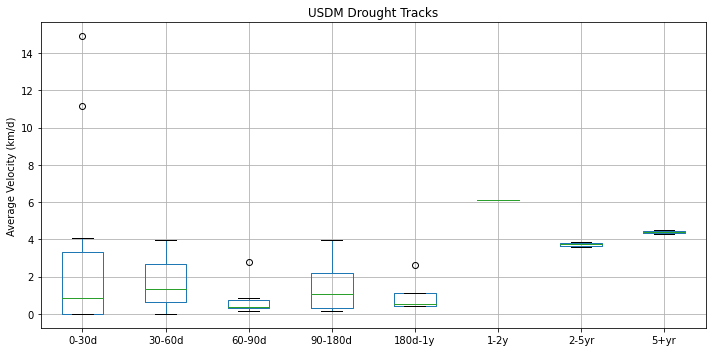

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['average velocity']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

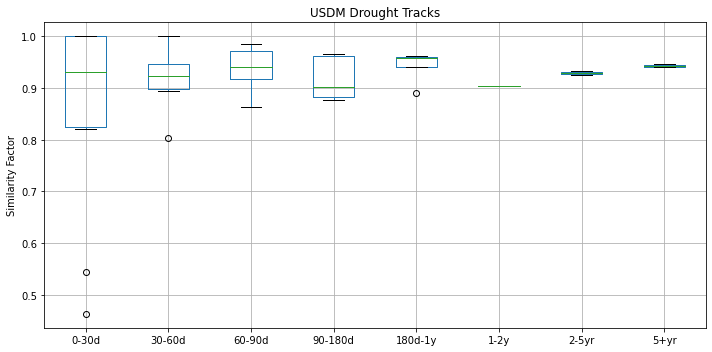

In [31]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['similarity']).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

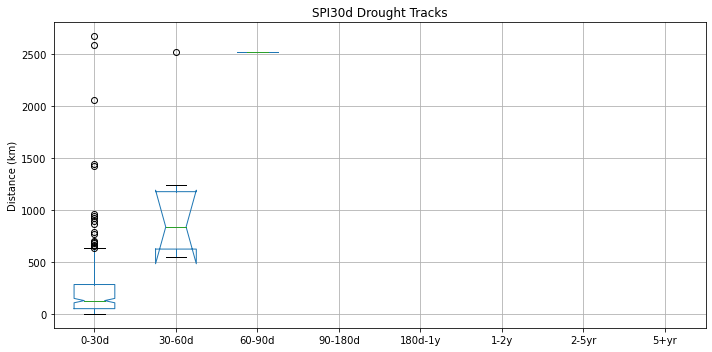

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['distance']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI30d Drought Tracks")

plt.tight_layout()

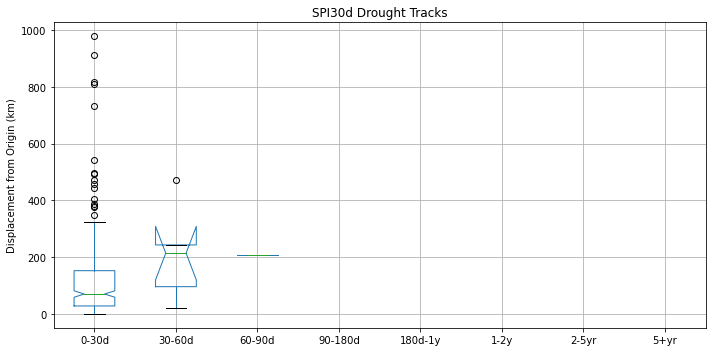

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['displacement']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

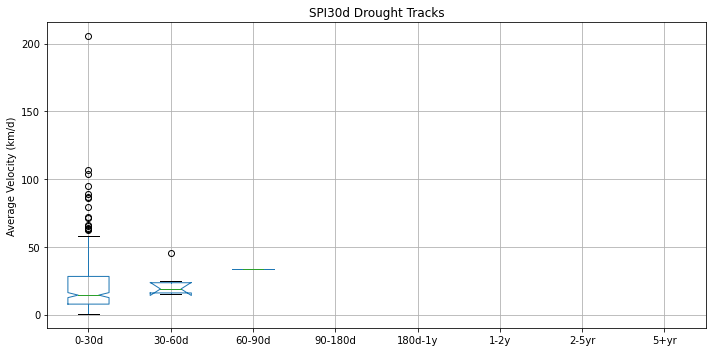

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['average velocity']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

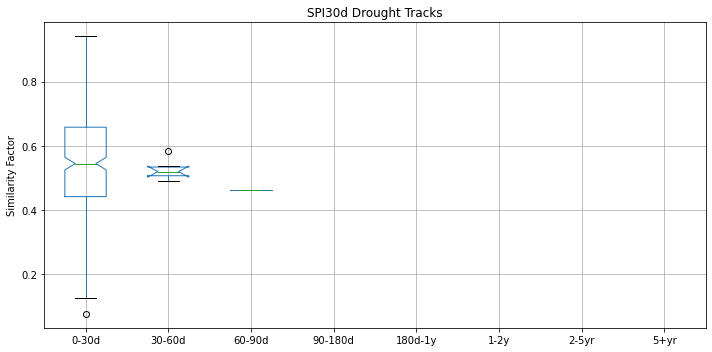

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['similarity']).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

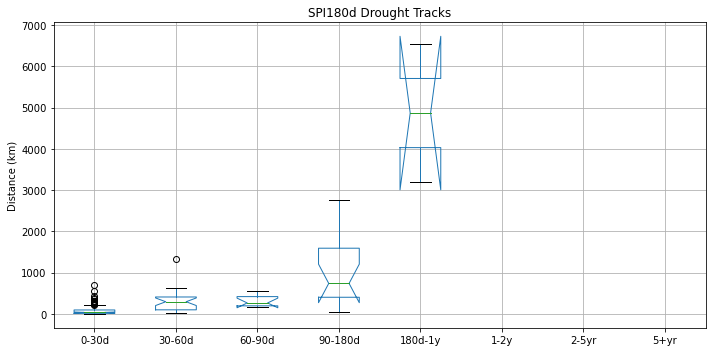

In [36]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['distance']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI180d Drought Tracks")

plt.tight_layout()

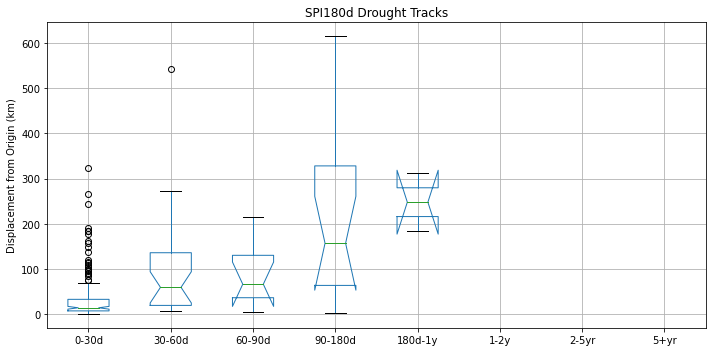

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['displacement']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

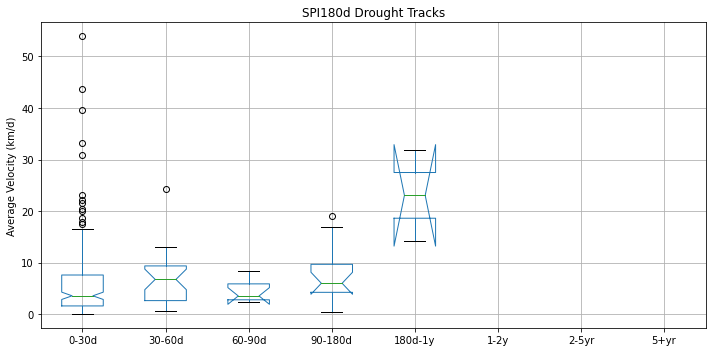

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['average velocity']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

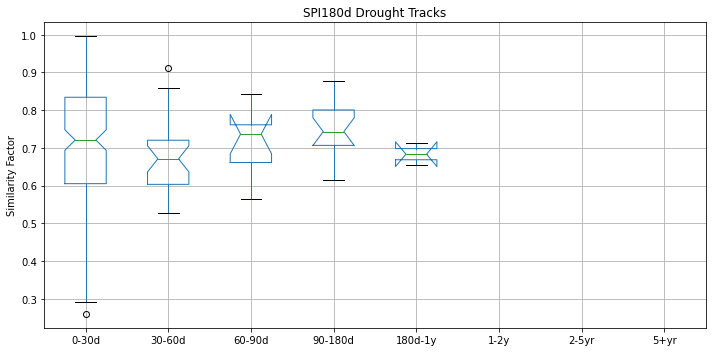

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['similarity']).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

In [40]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(0.0, 30.0, closed='right'),
 Interval(30.0, 60.0, closed='right')]

In [41]:
pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])

,lifetime,distance,displacement,average velocity,similarity,xy_size,uv_size
106,70,199338.022173,5231.107306,2847.686031,0.747441,"[153, 145, 151, 312, 312, 132, 110, 102, 119, ...","[145, 151, 312, 132, 107, 110, 102, 119, 139, ..."
108,65,549166.341984,130094.682307,8448.712954,0.564640,"[109, 158, 397, 989, 855, 855, 487, 204, 612, ...","[158, 397, 989, 855, 487, 204, 612, 293, 754, ..."
122,75,265994.100671,106542.263942,3546.588009,0.700665,"[166, 205, 277, 315, 414, 740, 164, 267, 251, ...","[205, 277, 315, 414, 740, 164, 267, 251, 214, ..."
123,65,166997.497782,36207.364231,2569.192274,0.736602,"[113, 349, 613, 856, 1151, 1089, 1204, 1337, 1...","[349, 613, 856, 1151, 1089, 1204, 1337, 1316, ..."
143,70,196143.310871,56415.941108,2802.047298,0.842082,"[1373, 2156, 2974, 3578, 3974, 4599, 4535, 435...","[2156, 2974, 3578, 3974, 4599, 4535, 4357, 467..."
183,65,336356.245469,158381.496500,5174.711469,0.661292,"[142, 217, 328, 509, 601, 148, 200, 589, 2241,...","[217, 328, 509, 601, 148, 200, 589, 2241, 2850..."
195,90,530138.062199,214181.157074,5890.422913,0.761282,"[144, 1248, 850, 825, 1179, 1410, 915, 827, 10...","[1248, 850, 825, 1179, 1410, 915, 827, 1093, 1..."
196,85,195286.425482,8444.688026,2297.487359,0.800686,"[1019, 1136, 1164, 1479, 1602, 1670, 1026, 108...","[1136, 1164, 1479, 1602, 1670, 1026, 1087, 827..."
219,65,419597.999045,66124.893159,6455.353831,0.595894,"[251, 344, 559, 594, 530, 526, 520, 1149, 585,...","[344, 559, 594, 530, 526, 520, 1149, 585, 504,..."


Okay, neat. So if I want to make a summarizing plot, then I can technically do that. Gonna be annoying, but it's possible. Or if I just want to get more info based on the groupings

## Origin / Termination

In [42]:
def get_origins(x_track, y_track):
    x_origins = [x[0] for x in x_track]
    y_origins = [y[0] for y in y_track]
    
    return x_origins, y_origins

def get_terminations(x_track, y_track, u_track, v_track):
    x_termination = [x[-1]+u[-1] for x, u in zip(x_track, u_track)]
    y_termination = [y[-1]+v[-1] for y, v in zip(y_track, v_track)]

    return x_termination, y_termination

In [43]:
usdm_x_origins, usdm_y_origins = get_origins(usdm_dtd['x'], usdm_dtd['y'])

In [44]:
usdm_x_terminations, usdm_y_terminations = get_terminations(
    usdm_dtd['x'],
    usdm_dtd['y'],
    usdm_dtd['u'],
    usdm_dtd['v']
)

In [45]:
spi30d_x_origins, spi30d_y_origins = get_origins(spi30d_dtd['x'], spi30d_dtd['y'])
spi30d_x_terminations, spi30d_y_terminations = get_terminations(
    spi30d_dtd['x'],
    spi30d_dtd['y'],
    spi30d_dtd['u'],
    spi30d_dtd['v']
)

In [46]:
spi180d_x_origins, spi180d_y_origins = get_origins(spi180d_dtd['x'], spi180d_dtd['y'])
spi180d_x_terminations, spi180d_y_terminations = get_terminations(
    spi180d_dtd['x'],
    spi180d_dtd['y'],
    spi180d_dtd['u'],
    spi180d_dtd['v']
)

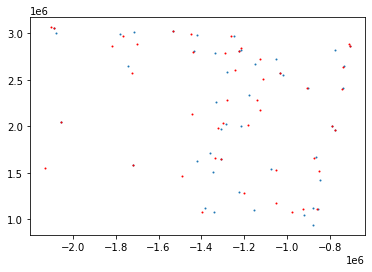

In [47]:
fig, ax = plt.subplots()

ax.scatter(usdm_x_origins, usdm_y_origins, s=1)
ax.scatter(usdm_x_terminations, usdm_y_terminations, s=1, c='r')

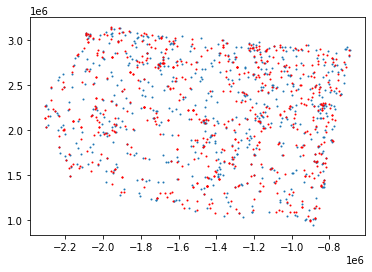

In [48]:
fig, ax = plt.subplots()

ax.scatter(spi30d_x_origins, spi30d_y_origins, s=1)
ax.scatter(spi30d_x_terminations, spi30d_y_terminations, s=1, c='r')

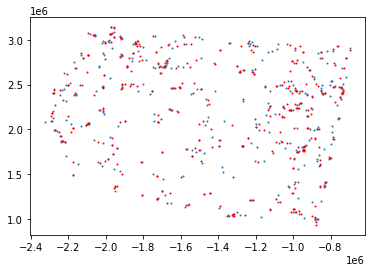

In [49]:
fig, ax = plt.subplots()

ax.scatter(spi180d_x_origins, spi180d_y_origins, s=1)
ax.scatter(spi180d_x_terminations, spi180d_y_terminations, s=1, c='r')

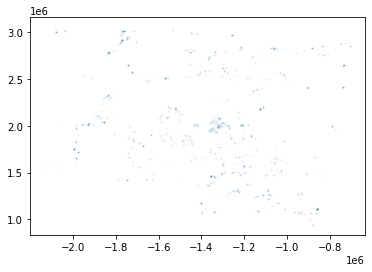

In [50]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(usdm_dtd['x']), np.hstack(usdm_dtd['y']), alpha=0.05, s=1)

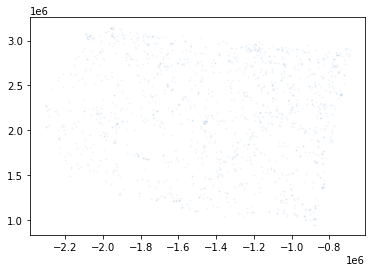

In [51]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi30d_dtd['x']), np.hstack(spi30d_dtd['y']), alpha=0.05, s=1)

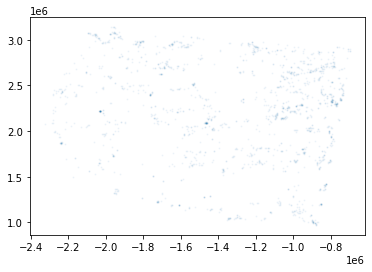

In [52]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi180d_dtd['x']), np.hstack(spi180d_dtd['y']), alpha=0.05, s=1)

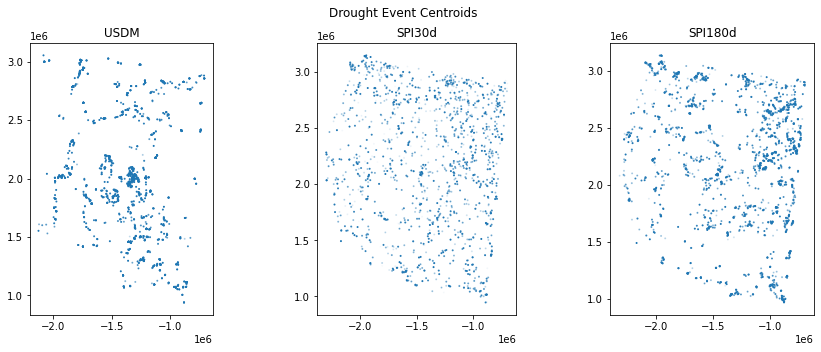

In [53]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(np.hstack(data['x']), np.hstack(data['y']), alpha=np.hstack(data['a']), s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

In [54]:
import geopandas as gpd

In [55]:
df = gpd.read_file('/pool0/home/steinjao/data/drought/drought_impact/data/geometry/tl_2022_us_state.shp')
df.to_crs("EPSG:4326");
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

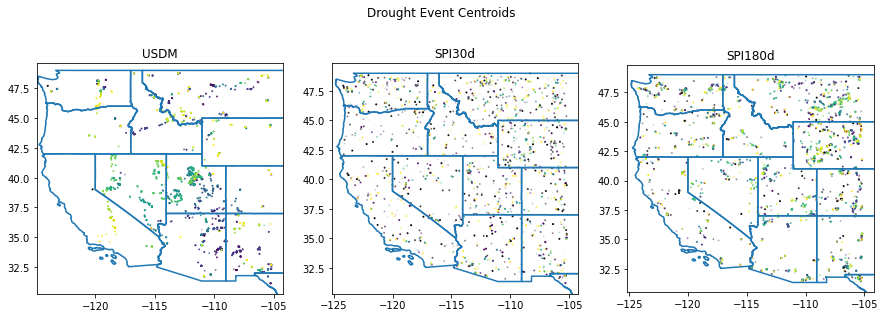

In [56]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):

    colors = []
    for track in data['c']:
        for val in track:
            colors.append(val)
    x = np.hstack(data['x'])
    y = np.hstack(data['y'])


    lat, lon = dnw.transform_points(x, y)
    ax.scatter(lon, lat, alpha=np.hstack(data['a']), s=1, c=colors)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    us49.boundary.plot(ax=ax)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

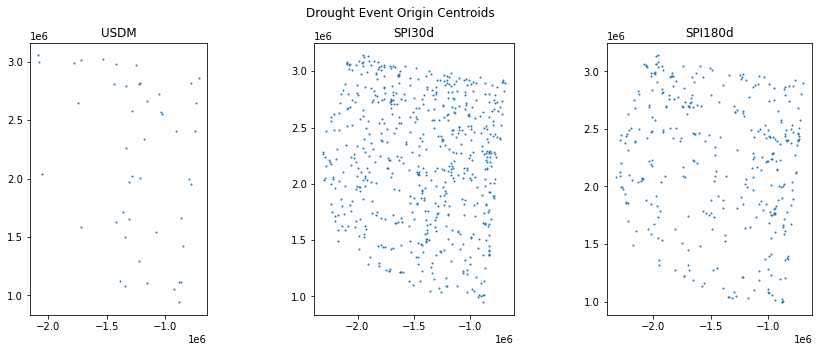

In [57]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_origins, y_origins, title in zip(
    axs.ravel(), 
    [usdm_x_origins, spi30d_x_origins, spi180d_x_origins],
    [usdm_y_origins, spi30d_y_origins, spi180d_y_origins],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_origins, y_origins, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Origin Centroids')
fig.set_facecolor('w')

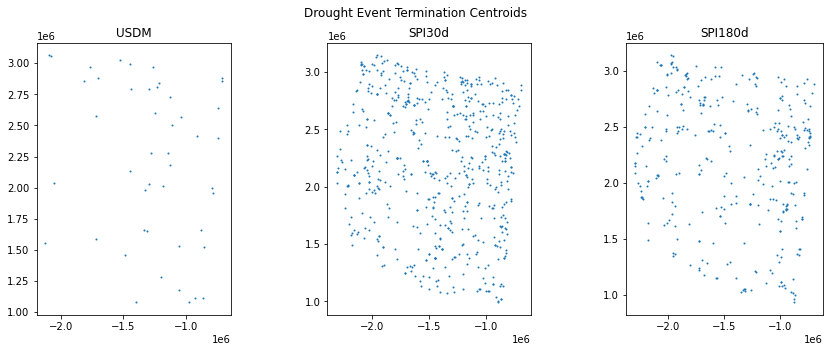

In [58]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_terminations, y_terminations, title in zip(
    axs.ravel(), 
    [usdm_x_terminations, spi30d_x_terminations, spi180d_x_terminations],
    [usdm_y_terminations, spi30d_y_terminations, spi180d_y_terminations],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_terminations, y_terminations, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Termination Centroids')
fig.set_facecolor('w')

## Area Signature

### USDM

In [59]:
intervals = list(set(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right'),
 Interval(1825.0, 8141.0, closed='right'),
 Interval(730.0, 1825.0, closed='right'),
 Interval(365.0, 730.0, closed='right'),
 Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(0.0, 30.0, closed='right'),
 Interval(90.0, 180.0, closed='right')]

In [60]:
sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

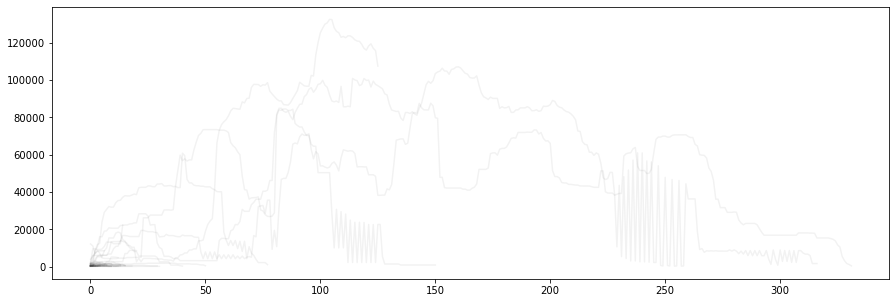

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in usdm_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

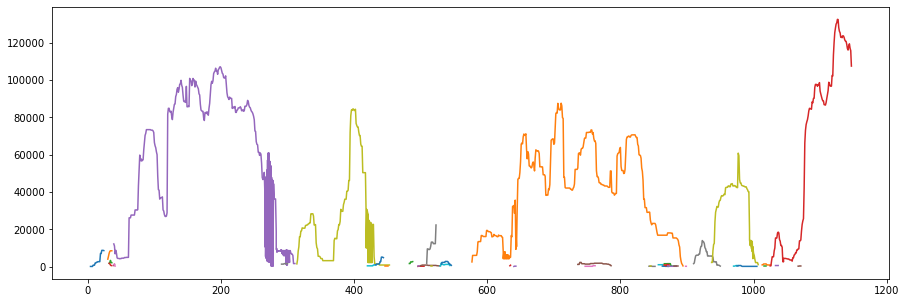

In [62]:
fig, ax = plt.subplots(figsize=(15,5))

for t_track, s_track in zip(usdm_dtd['t'], usdm_dtd['s']):
    ax.plot(t_track, s_track)

In [63]:
usdm_dnet = dnet.DroughtNetwork.unpickle(f"/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net_{exp_tag}.pickle")

<AxesSubplot:xlabel='Time', ylabel='Area in Drought Event'>

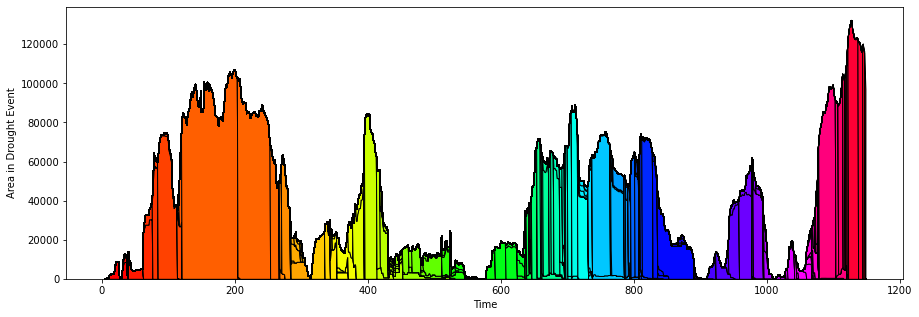

In [64]:
fig, ax = plt.subplots(figsize=(15,5))

usdm_dnet.stacked_events_plot(edgecolor='k', ax=ax)

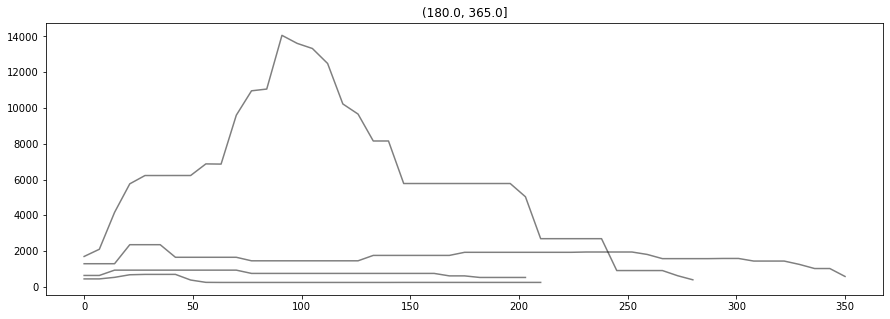

In [65]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

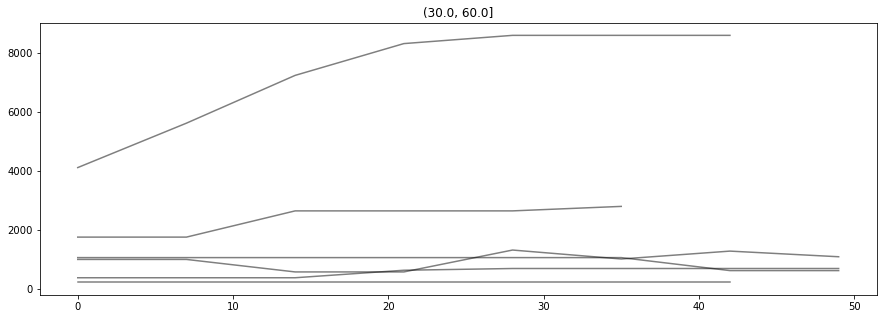

In [66]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

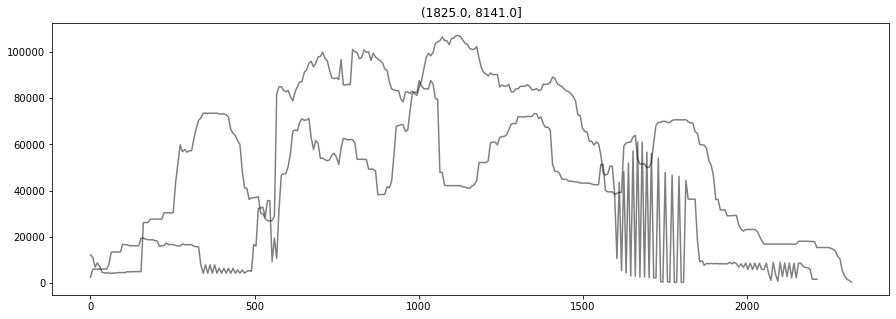

In [67]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

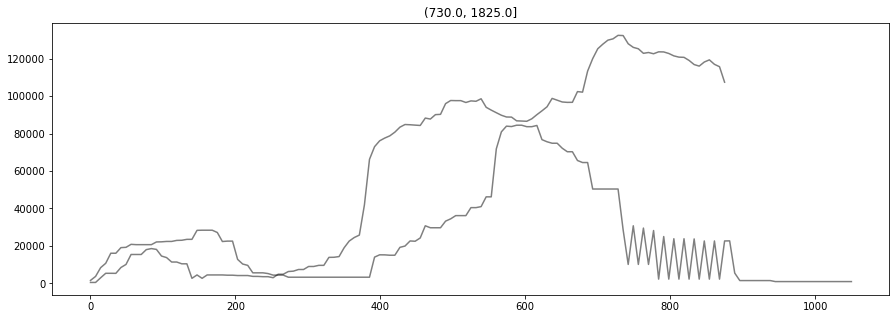

In [68]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

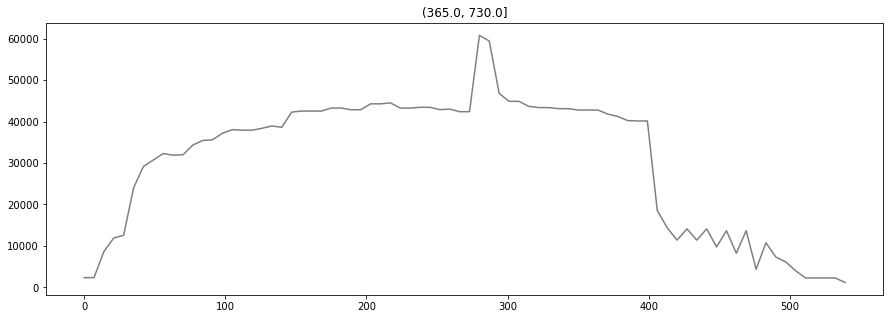

In [69]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

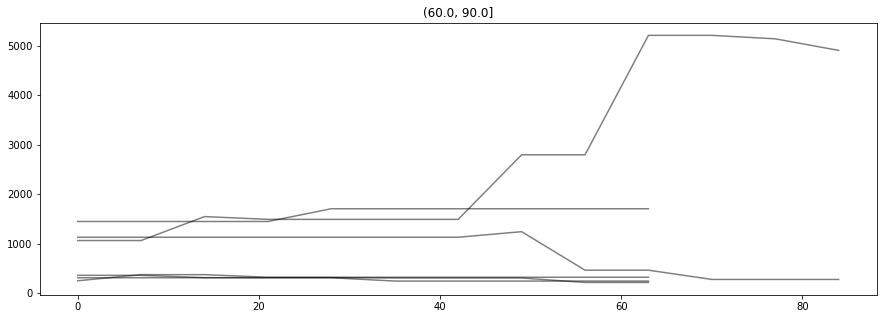

In [70]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

KeyError: nan

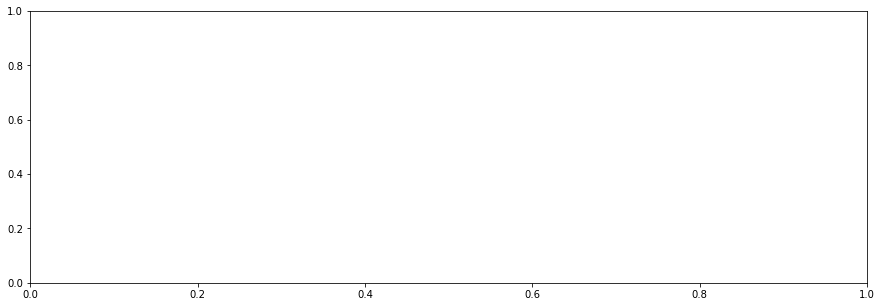

In [71]:
fig, ax = plt.subplots(figsize=(15,5))

i = 6

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

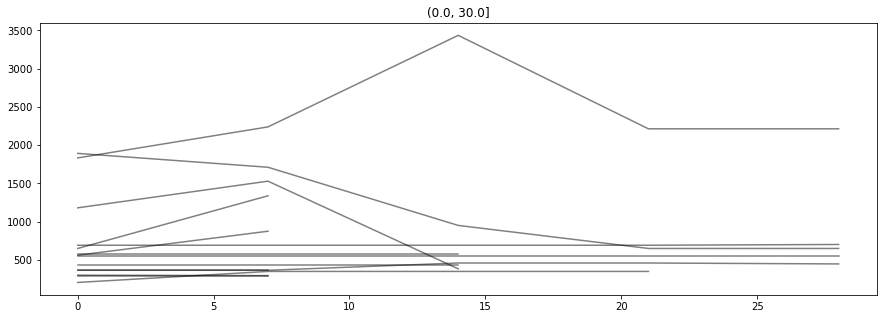

In [72]:
fig, ax = plt.subplots(figsize=(15,5))

i = 7

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

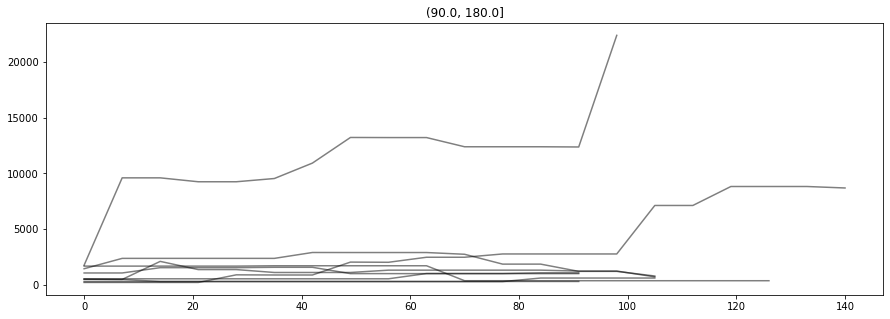

In [73]:
fig, ax = plt.subplots(figsize=(15,5))

i = 8

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

### SPI

In [74]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(0.0, 30.0, closed='right'),
 Interval(30.0, 60.0, closed='right')]

In [75]:
sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

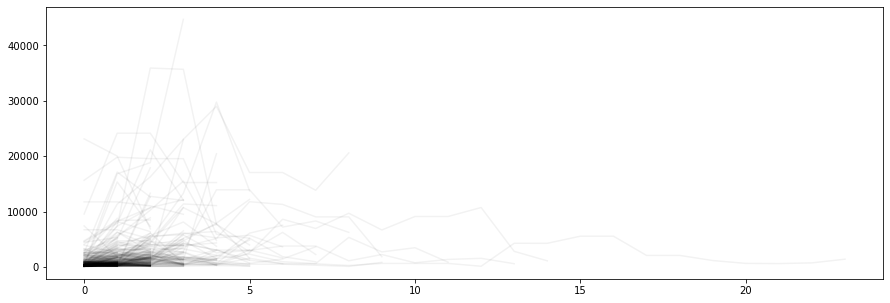

In [76]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in spi30d_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

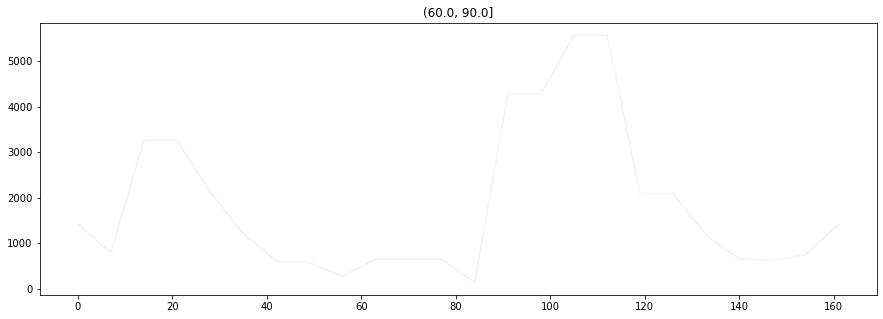

In [77]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

KeyError: nan

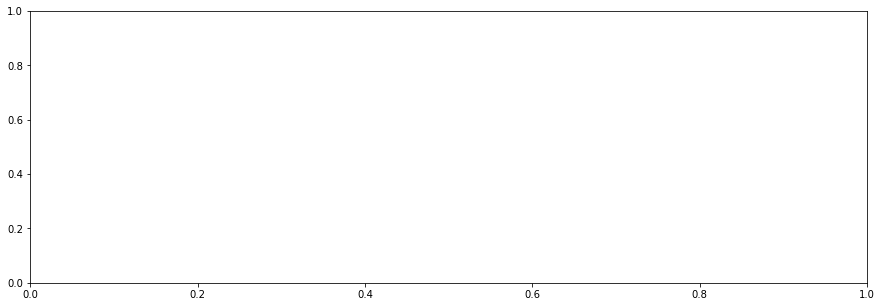

In [78]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

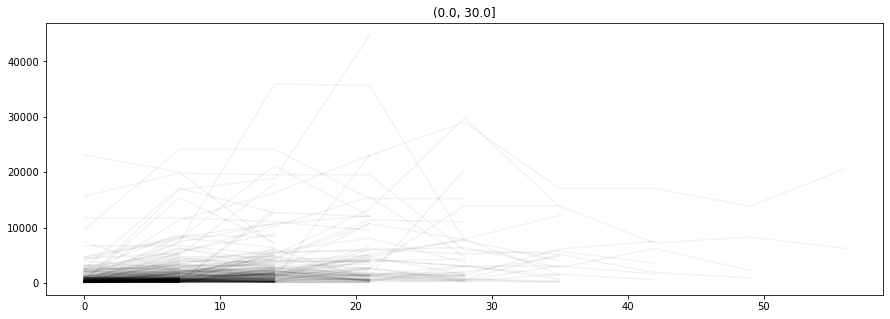

In [79]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

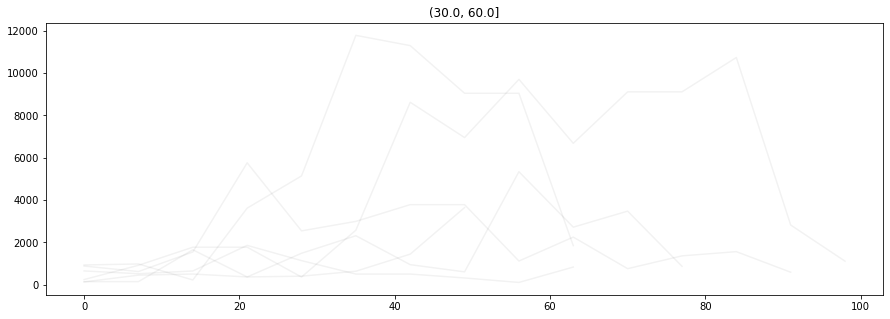

In [80]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

IndexError: list index out of range

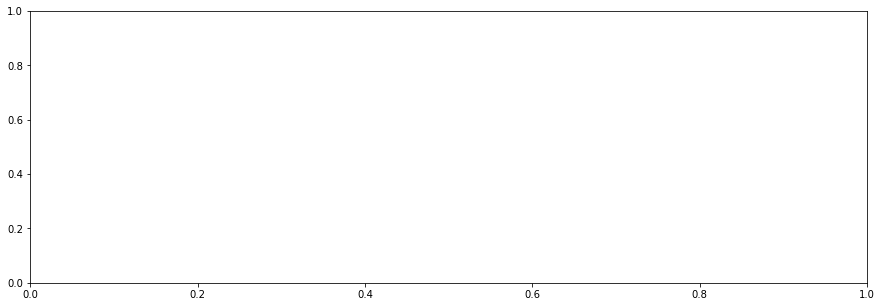

In [81]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

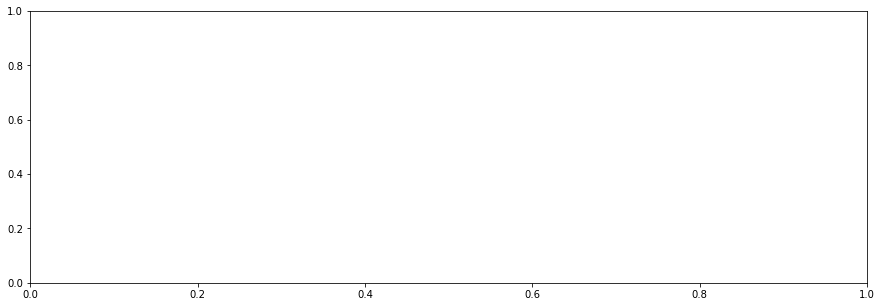

In [82]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

### SPI 180D

In [83]:
intervals = list(set(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right'),
 Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(0.0, 30.0, closed='right'),
 Interval(90.0, 180.0, closed='right')]

In [84]:
sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

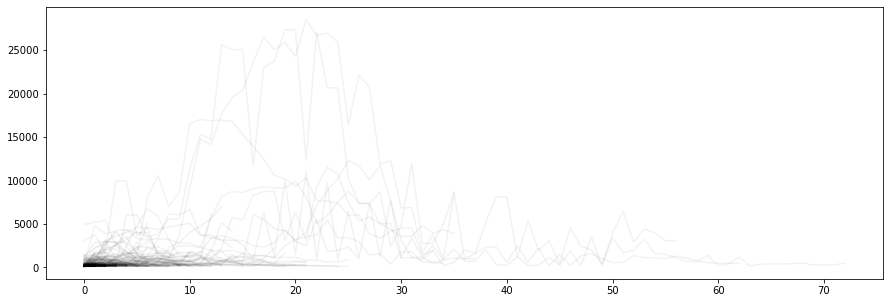

In [85]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in spi180d_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

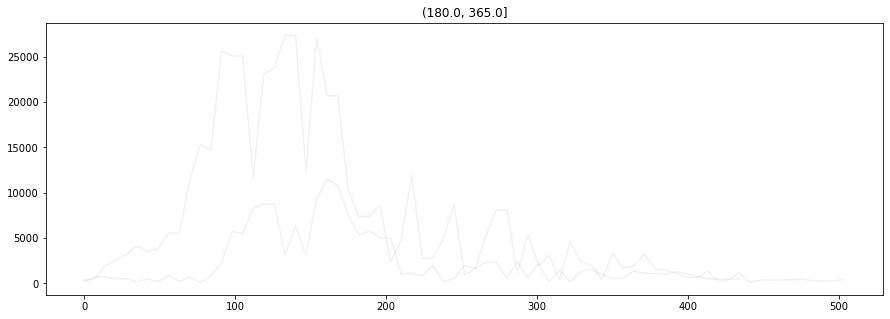

In [86]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

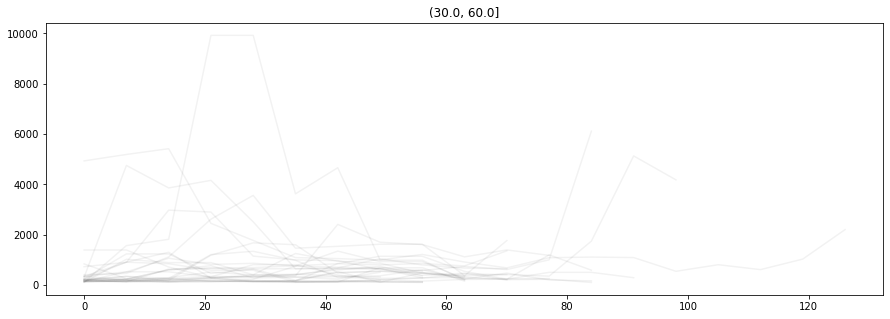

In [87]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

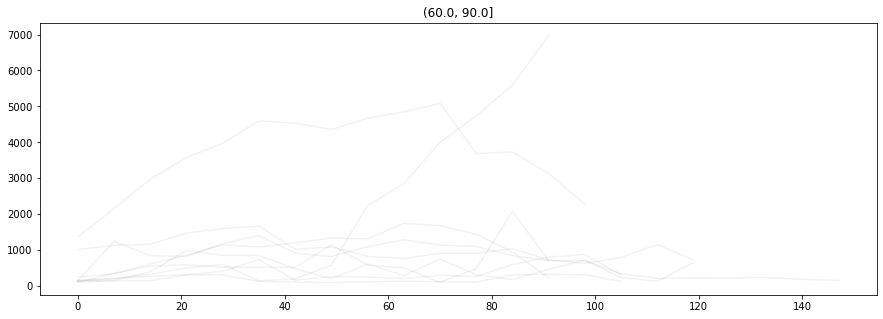

In [88]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

KeyError: nan

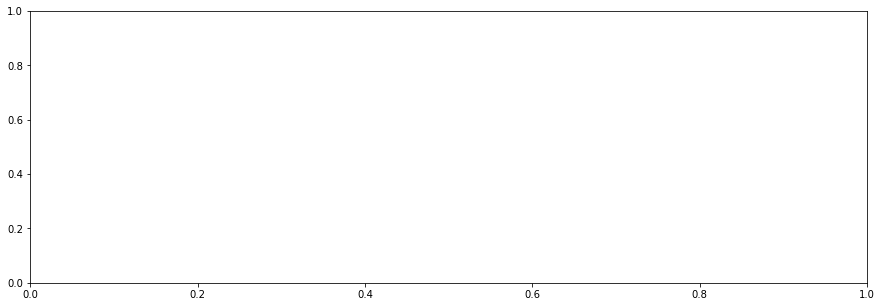

In [89]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

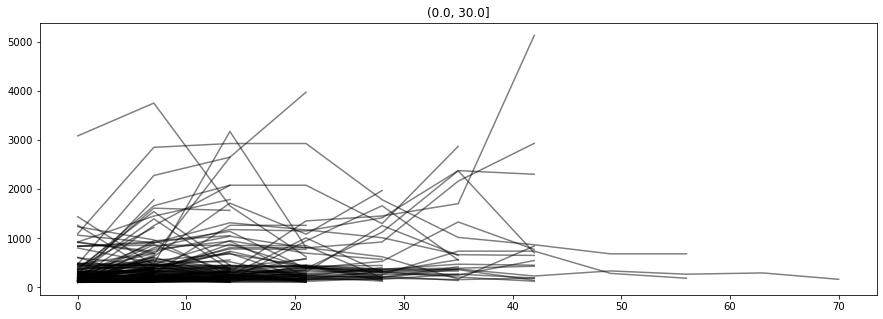

In [90]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

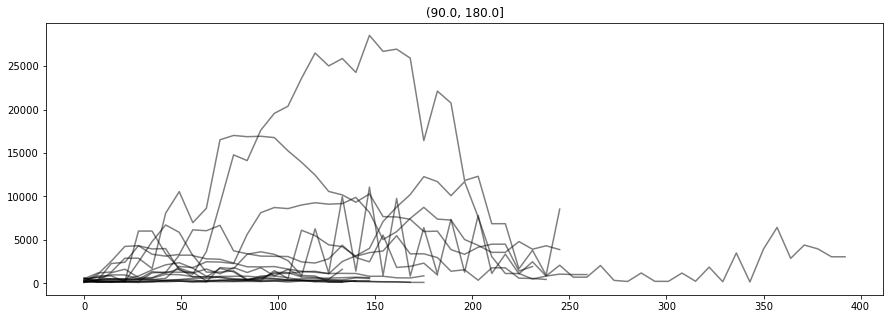

In [91]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

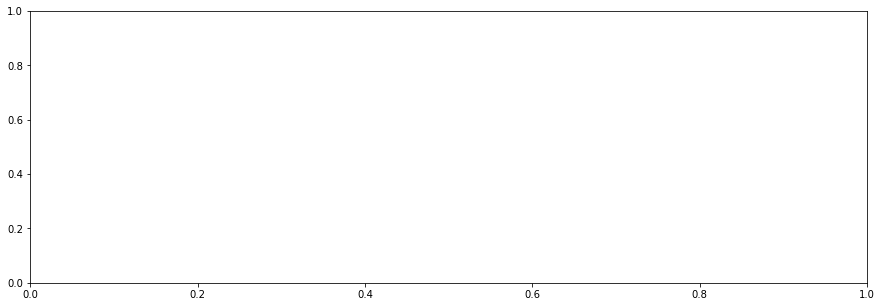

In [92]:
fig, ax = plt.subplots(figsize=(15,5))

i = 6

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

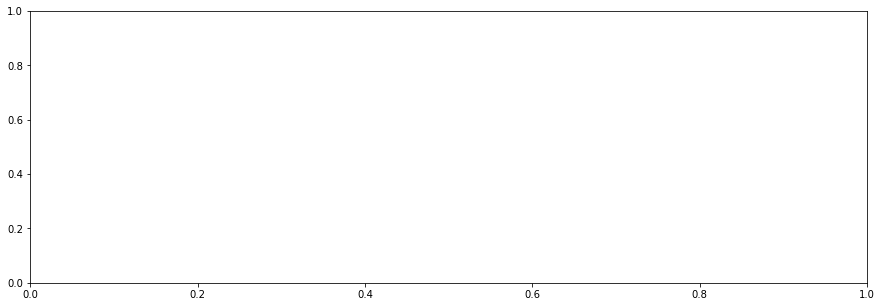

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 7

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);